In [1]:
import KNNclassy
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
importlib.reload(KNNclassy)

<module 'KNNclassy' from '/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/KNNclassy.py'>

In [2]:
def ROC_NS(algo, thr_wanted = [], figname="ROC_NS"):
    allprob = algo.metrics["probab"]
    v_prob_NS = 1-allprob[:,0]
    events_have_NS = np.where((algo.label_test==1) | (algo.label_test==2))[0]
    N = len(events_have_NS)
    M = len(algo.label_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_NS>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_NS:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        if (len(thr_wanted)>0 and (thr in thr_wanted)):
            print("Threshold ",thr, "TP: {:.3f}, FP {:.3f}".format(TP[i], FP[i]))
        i = i + 1

    plt.figure()
    sc=plt.scatter(FP, TP, c=threshold, cmap='viridis')
    plt.colorbar(sc, label="Threshold")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.title(eos)
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    plt.show()
    plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    plt.close()
    return np.asarray(FP), np.asarray(TP), threshold

def ROC_REM(algo, thr_wanted = [], figname="ROC_REM"):
    allprob = algo.metrics["probab"]
    v_prob_REM = allprob[:,2]
    events_have_REM = np.where(algo.label_test==2)[0]
    N = len(events_have_REM)
    M = len(algo.label_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_REM>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_REM:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        if (len(thr_wanted)>0 and (thr in thr_wanted)):
            print("Threshold ",thr, "TP: {:.3f}, FP {:.3f}".format(TP[i], FP[i]))
        i = i + 1

    plt.figure()
    sc=plt.scatter(FP, TP, c=threshold, cmap='viridis')
    plt.colorbar(sc, label="Threshold")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.title(eos)
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    plt.show()
    plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    plt.close()
    return np.asarray(FP), np.asarray(TP), threshold


In [25]:
def hists_paper(EOS, EOSdic):
    
    fig, ax = plt.subplots(2,3, sharey = 'all', figsize=(28,13))
    
    for i in range(0,2):
        for j in range(0,3):
            ax[i,j].tick_params(axis='y',labelsize=22)
            ax[i,j].tick_params(axis='x',labelsize=22)
            
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.05)
            
    for i,eos in enumerate(EOS):
        
        probs = EOSdic[eos]['knn'].metrics["probab"]
        predNS=1-probs[:,0]
        predREM=probs[:,2]
        truelabel=EOSdic[eos]['knn'].label_test
        index_events_hasNS=(np.where((truelabel == 1) | (truelabel == 2)))
        p_events_hasNS=predNS[index_events_hasNS]
        index_events_nohasNS=np.where(truelabel==0)
        p_events_nohasNS=predNS[index_events_nohasNS]
        
        index_events_hasREM=np.where(truelabel == 2)
        p_events_hasREM=predREM[index_events_hasREM]
        index_events_nohasREM=np.where((truelabel==0) | (truelabel==1))
        p_events_nohasREM=predREM[index_events_nohasREM]
        
        ax[0,i].hist(p_events_nohasNS,bins=np.linspace(0,1,20),color='green',alpha=0.5, label='No NS')
        ax[0,i].hist(p_events_hasNS,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label='Has NS')
        ax[0,i].set_yscale('log')
        ax[0,i].set_yticks([1e2,1e3,1e4,1e5])
        ax[0,i].set_xticks([0,0.2,0.4,0.6,0.8,1])
        ax[0,i].set_ylim([4.5e1,1.9e5])
        ax[0,i].set_xlabel('P(HasNS)', fontsize = 22)
        ax[0,i].axvline(x=0.5,color='black',ls='--')
        ax[0,i].grid(ls='--')
        ax[0,i].set_title(eos, fontsize = 24)
        handles, labels = ax[0,i].get_legend_handles_labels()
        order = [1,0]
        #add legend to plot
        ax[0,i].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=22,loc=1)
        
        ax[1,i].hist(p_events_nohasREM,bins=np.linspace(0,1,20),color='green',alpha=0.5, label='No Remnant')
        ax[1,i].hist(p_events_hasREM,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label='Has Remnant')
        ax[1,i].set_yticks([1e2,1e3,1e4,1e5])
        ax[1,i].set_xticks([0,0.2,0.4,0.6,0.8,1])
        ax[1,i].set_xlabel('P(HasRemnant)', fontsize = 22)
        ax[1,i].axvline(x=0.5,color='black',ls='--')
        ax[1,i].set_title(eos, fontsize = 24)
        ax[1,i].grid(ls='--')
        handles, labels = ax[1,i].get_legend_handles_labels()
        order = [1,0]
        #add legend to plot
        ax[1,i].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=22,loc=1)
    

    plt.show()
 #   fig.savefig("hists_KNN_paper.png",dpi=200,bbox_inches='tight')
    fig.tight_layout()
    return
                     

def ROC_paper(EOS,EOSdic):
    
    EOSgrey = ["APR4_EPP",  "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLY2", "SLY9", "SLY230A"]
    EOScolor = ["BHF_BBB2", "MS1_PP", "SLy"]

    fig, ax = plt.subplots(1,2, figsize = (18,6))
    
    for i in range(0,2):
        ax[i].tick_params(axis='y',labelsize=20)
        ax[i].tick_params(axis='x',labelsize=20)
            
    fig.subplots_adjust(wspace=0.35)
    
    j = 0
    color = ["orange", "blue", "green"]

    for eos in EOS:
            
        TPns = EOSdic[eos]['NS_TP']
        FPns = EOSdic[eos]['NS_FP']

        TPrem = EOSdic[eos]['REM_TP']
        FPrem = EOSdic[eos]['REM_FP']
             
        if eos in EOSgrey:
            ax[0].plot(FPns,TPns,linestyle = 'solid', c='grey', linewidth=0.3)
            ax[1].plot(FPrem,TPrem,linestyle = 'solid', c='grey', linewidth=0.3)
        elif eos in EOScolor: 
            ax[0].plot(FPns,TPns,linestyle = 'solid', c=color[j], label=eos)
            ax[1].plot(FPrem,TPrem,linestyle = 'solid', c=color[j], label=eos)
            
            j = j+1
                       
    for i in range(0,2):

        ax[i].set_xlabel("FPR", fontsize = 20)
        ax[i].set_ylabel("TPR", fontsize = 20)
        ax[i].grid(ls='--')
        ax[i].set_ylim([0.82,1.02])
        ax[i].set_yticks(np.linspace(0.825,1,8))
        ax[i].set_xlim([0,0.08])
  
    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20)
    ax[0].set_title('Has NS', fontsize = 22)
    ax[1].set_title('Has REM', fontsize = 22)
    plt.savefig('KNN-roc_paper.png',dpi=200,bbox_inches='tight')
    plt.show()
    return

def generateMasses(algo,N):
    data=algo.xtest
    maxm1=np.max(data[:,0])
    minm1=np.min(data[:,0])
    maxm2=np.max(data[:,1])
    minm2=np.min(data[:,1])
    print("Trained with m1 in (",minm1,",",maxm1,")")
    print("Trained with m2 in (",minm2,",",maxm2,")")
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    masses = []
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                masses.append([m1[i],m2[j]])

    return masses

def generateMasses_limited(N):
    maxm1=50
    minm1=1
    maxm2=12
    minm2=1
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    masses=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                masses.append([m1[i],m2[j]])

    return masses

        
def probLabelDensePlot(masses,EOS,BayesFactor):
    N=len(masses)
    
    events = []
    m1=np.zeros(N)
    m2=np.zeros(N)
    chi1 = [0,0,0.9,0.9]
    chi2 = [0,0.9,0,0.9]
    snr = 11
    EOSdic = {}
    count = 0
    
    for eos in EOS:
        print("Doing", eos)
        KNN = KNNclassy.ClassificationKNN()
        KNN.loadModel("models_eos/", "knn_3cat_eos_"+eos)
        new_dic = {}
        new_dic['knn'] = KNN
        new_dic['bayes'] = BayesFactor[count]
        EOSdic[eos] = new_dic
        count = count + 1
    
    fig, ax = plt.subplots(4,2,sharex = "none", sharey = "all", figsize = (30,20))
    
    for i in range(0,4):
        for j in range(0,2):
            ax[i,j].tick_params(axis='y',labelsize=22)
            ax[i,j].tick_params(axis='x',labelsize=22)
            
    fig.subplots_adjust(hspace=0.75)
    fig.subplots_adjust(wspace=0.05)
    
    for k in range(0,N):
        m1[k]=masses[k][0]
        m2[k]=masses[k][1]
    
    for i in range(0,len(chi1)):
        pHasNS = 0
        pHasREM = 0
        X=[]
        for k in range(0,N):
            X.append([masses[k][0],masses[k][1],chi1[i],chi2[i],snr])
            
        for eos in EOS:
            EOSdic[eos]['probs'] = KNN.model.predict_proba(X)
            pHasNS += (1 - EOSdic[eos]['probs'][:,0]) * EOSdic[eos]['bayes']
            pHasREM += EOSdic[eos]['probs'][:,2]  * EOSdic[eos]['bayes']
                
        total = sum(BayesFactor)
        p= pHasNS/total
        pHasNSfin = pHasNS/total
        pHasREMfin = pHasREM/total
    
        scNS=ax[i,0].scatter(m1,m2, c=pHasNSfin, vmin=0, vmax=1, s=40, cmap='viridis')
        scREM=ax[i,1].scatter(m1,m2, c=pHasREMfin, vmin=0, vmax=1, s=40, cmap='viridis')
        ax[i,0].axhline(y = 3, color = 'r', linestyle = '-')
            
        ax[i,0].set_title(r'$\chi^z_1$ = '+str(chi1[i])+', $\chi^z_2$ = '+str(chi2[i])+', SNR='+str(snr),fontsize=24)
        ax[i,1].set_title(r'$\chi^z_1$ = '+str(chi1[i])+', $\chi^z_2$ = '+str(chi2[i])+', SNR='+str(snr),fontsize=24)
        ax[i,0].set_ylabel(r"$m_2$",fontsize = 22)
        ax[i,0].set_xlabel(r"$m_1$", fontsize=22)
        ax[i,1].set_xlabel(r"$m_1$", fontsize=22)
        ax[i,0].set_xlim([1,50])
        ax[i,1].set_xlim([1,50])
        
#    cbarNS = fig.colorbar(scNS,ax=ax[:, 0], shrink = 0.6)
    cbarREM = fig.colorbar(scREM,ax=ax[:, 1], shrink = 0.8)
#    cbarNS.ax.tick_params(labelsize=20)
    cbarREM.ax.tick_params(labelsize=20)  
            
    ax[0,0].set_ylim([1,12])   
    plt.savefig('KNN-param-sweep-spin.png',dpi=200,bbox_inches='tight')
    
    chi1 = 0
    chi2 = 0
    snr = [5,7,9,11]
    

    
    fig, ax = plt.subplots(4,2,sharex = "none", sharey = "all", figsize = (30,20))
    
    for i in range(0,4):
        for j in range(0,2):
            ax[i,j].tick_params(axis='y',labelsize=22)
            ax[i,j].tick_params(axis='x',labelsize=22)
            
    fig.subplots_adjust(hspace=0.75)
    fig.subplots_adjust(wspace=0.05)
    
    for i in range(0,len(snr)):
        pHasNS = 0
        pHasREM = 0
        X = []
        for k in range(0,N):
            X.append([masses[k][0],masses[k][1],chi1,chi2,snr[i]])
            
        for eos in EOS:
            EOSdic[eos]['probs'] = KNN.model.predict_proba(X)
            pHasNS += (1 - EOSdic[eos]['probs'][:,0]) * EOSdic[eos]['bayes']
            pHasREM += EOSdic[eos]['probs'][:,2]  * EOSdic[eos]['bayes']
                
        total = sum(BayesFactor)
        p= pHasNS/total
        pHasNSfin = pHasNS/total
        pHasREMfin = pHasREM/total
    
        scNS=ax[i,0].scatter(m1,m2, c=pHasNSfin, vmin=0, vmax=1, s=40, cmap='viridis')
        scREM=ax[i,1].scatter(m1,m2, c=pHasREMfin, vmin=0, vmax=1, s=40, cmap='viridis')
        ax[i,0].axhline(y = 3, color = 'r', linestyle = '-')
            
        ax[i,0].set_title(r'$\chi^z_1$ = '+str(chi1)+', $\chi^z_2$ = '+str(chi2)+', SNR='+str(snr[i]),fontsize=18)
        ax[i,1].set_title(r'$\chi^z_1$ = '+str(chi1)+', $\chi^z_2$ = '+str(chi2)+', SNR='+str(snr[i]),fontsize=18)
        ax[i,0].set_ylabel(r"$m_2$",fontsize = 22)
        ax[i,0].set_xlim([1,50])
        ax[i,1].set_xlim([1,50])
        ax[i,0].set_xlabel(r"$m_1$", fontsize=22)
        ax[i,1].set_xlabel(r"$m_1$", fontsize=22)
#    cbarNS = fig.colorbar(scNS,ax=ax[:, 0],shrink = 0.6)
    cbarREM = fig.colorbar(scREM,ax=ax[:, 1], shrink = 0.8)
#    cbarNS.ax.tick_params(labelsize=20)
    cbarREM.ax.tick_params(labelsize=20)             
    
    ax[0,0].set_ylim([1,12])
    plt.savefig('KNN-param-sweep-SNR.png',dpi=200,bbox_inches='tight')
    return

In [4]:
pathClassy = "/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/"
pathData = "/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/input/"
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]
EOSgrey = ["APR4_EPP",  "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLY2", "SLY9", "SLY230A"]
EOScolor = ["BHF_BBB2", "MS1_PP", "SLy"]
BayesFactor = [1.526, 1.555, 0.056, 1.422, 1.177, 1.283, 0.276, 0.001, 0.009, 0.176, 0.179, 0.159, 0.108, 0.107, 0.33, 0.025, 0.288, 0.29, 0.618, 1.0, 1.028, 0.37, 0.932]

In [5]:
EOSdic = {}
count = 0

Doing APR4_EPP
loading  models_eos/knn_3cat_eos_APR4_EPP.joblib
Doing BHF_BBB2
loading  models_eos/knn_3cat_eos_BHF_BBB2.joblib
Doing H4
loading  models_eos/knn_3cat_eos_H4.joblib
Doing HQC18
loading  models_eos/knn_3cat_eos_HQC18.joblib
Doing KDE0V
loading  models_eos/knn_3cat_eos_KDE0V.joblib
Doing KDE0V1
loading  models_eos/knn_3cat_eos_KDE0V1.joblib
Doing MPA1
loading  models_eos/knn_3cat_eos_MPA1.joblib
Doing MS1_PP
loading  models_eos/knn_3cat_eos_MS1_PP.joblib
Doing MS1B_PP
loading  models_eos/knn_3cat_eos_MS1B_PP.joblib
Doing RS
loading  models_eos/knn_3cat_eos_RS.joblib
Doing SK255
loading  models_eos/knn_3cat_eos_SK255.joblib
Doing SK272
loading  models_eos/knn_3cat_eos_SK272.joblib
Doing SKI2
loading  models_eos/knn_3cat_eos_SKI2.joblib
Doing SKI3
loading  models_eos/knn_3cat_eos_SKI3.joblib
Doing SKI4
loading  models_eos/knn_3cat_eos_SKI4.joblib
Doing SKI5
loading  models_eos/knn_3cat_eos_SKI5.joblib
Doing SKI6
loading  models_eos/knn_3cat_eos_SKI6.joblib
Doing SKMP
loading

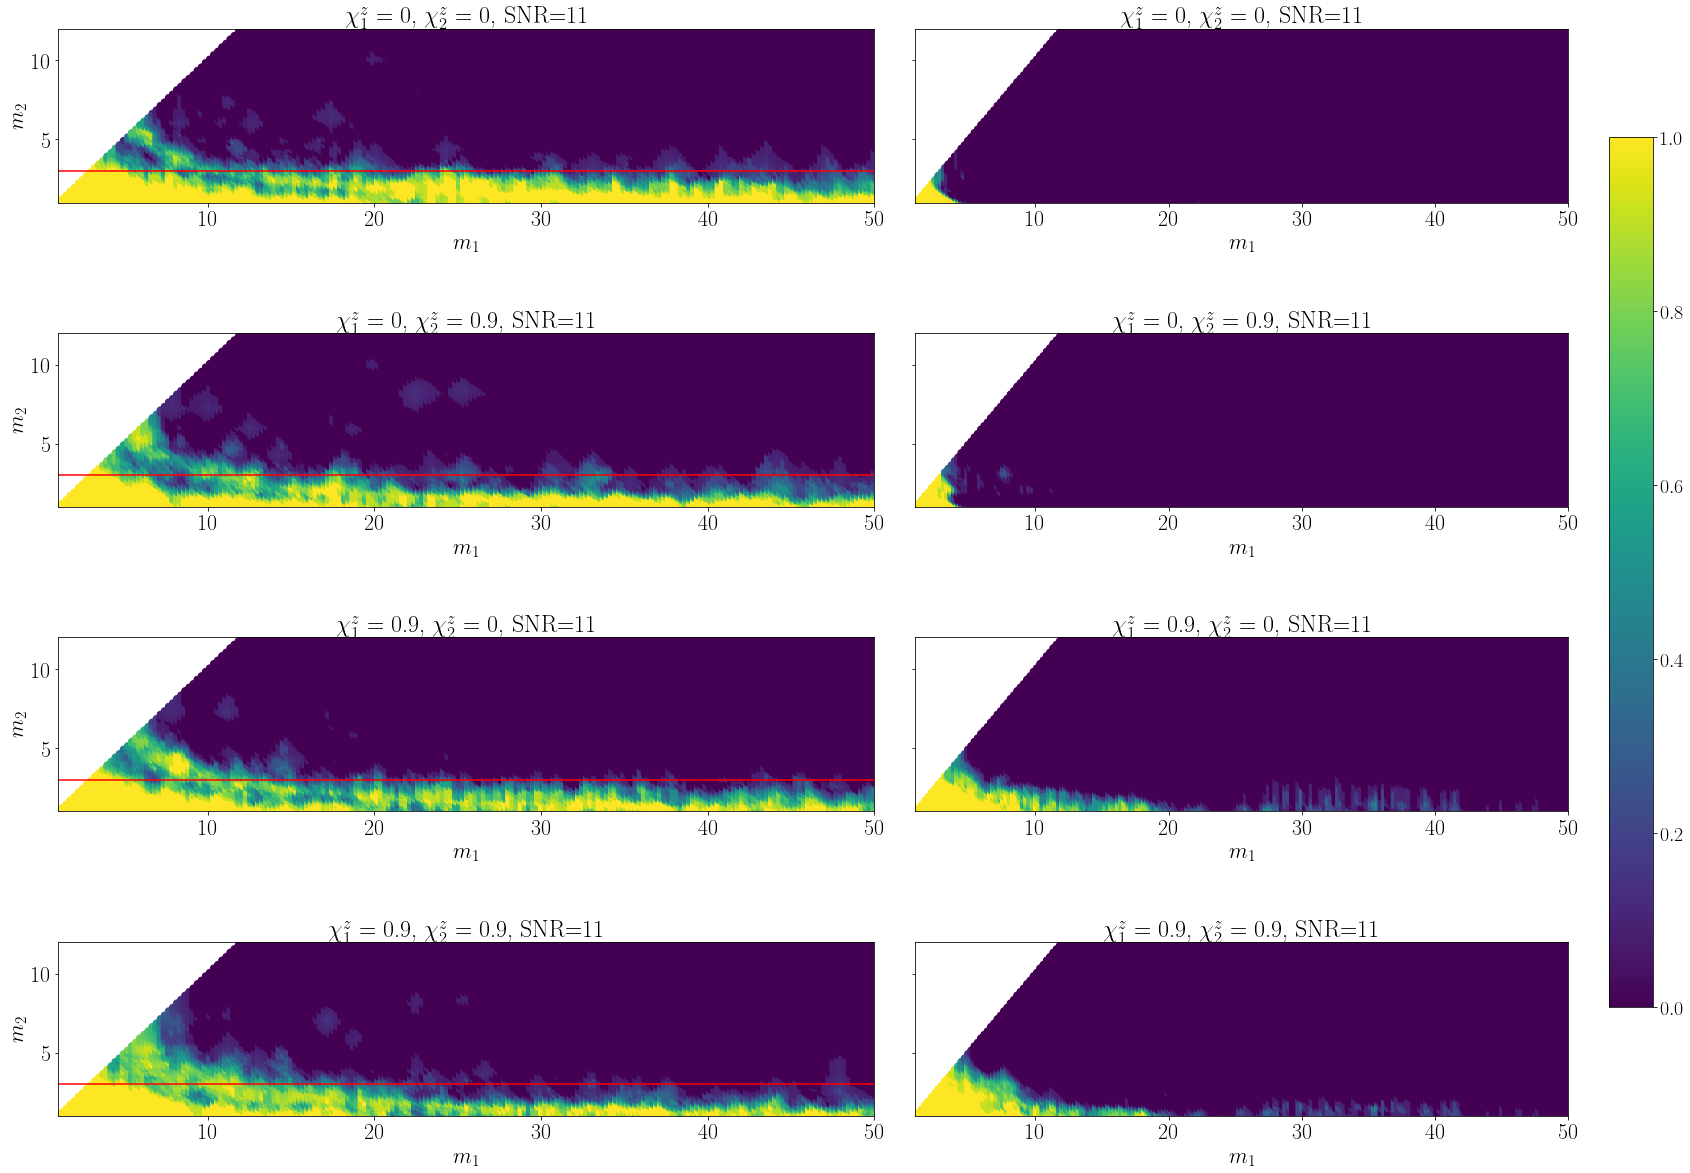

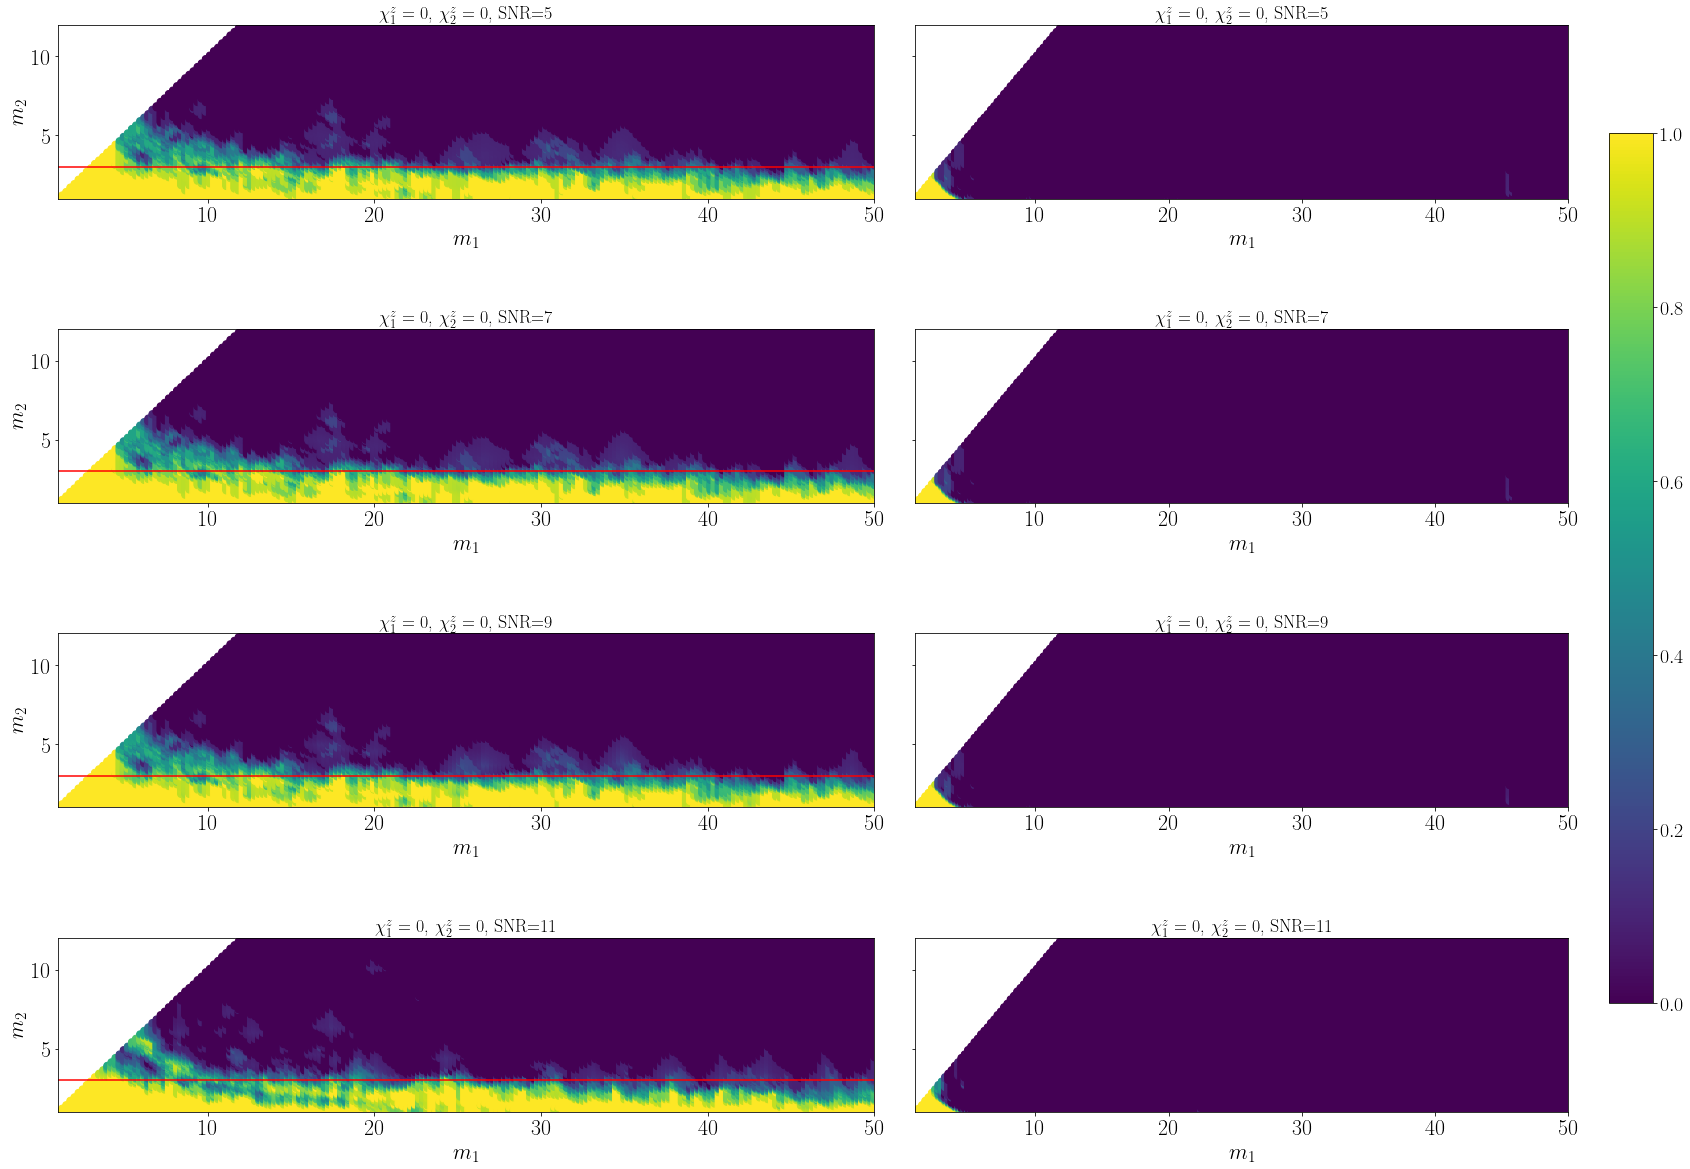

In [61]:
M_l=generateMasses_limited(200)
probLabelDensePlot(M_l,EOS,BayesFactor)

In [17]:
EOS_3 = ["BHF_BBB2","MS1_PP","SLy"]

In [18]:
for eos in EOS_3:
    print("Doing", eos)
    KNN = KNNclassy.ClassificationKNN()
    KNN.load_original_dataset(pathData,eos+"/EMB/original_data_"+eos+"_s300_f0d7.csv")
    KNN.loadModel(pathClassy+"optimal_models_final/", "knn_3cat_grid_eos_"+eos)
    new_dic = {}
    new_dic['knn'] = KNN
    new_dic['bayes'] = BayesFactor[count]
    EOSdic[eos] = new_dic
    count = count + 1
   
    KNN.compute_metrics()

    EOSdic[eos]['score'] = KNN.metrics['score']
    params_model = KNN.model.get_params()
    EOSdic[eos]['n_neigh'] = params_model.get('n_neighbors')
    EOSdic[eos]['metric'] = params_model.get('metric')
    EOSdic[eos]['algo'] = params_model.get('algorithm')
    EOSdic[eos]['weight'] = params_model.get('weights')
    

Doing BHF_BBB2
File shape :  (193624, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  193624
Nº of events for training:  135537
Nº of events for testing:  58087
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_BHF_BBB2.joblib
Model score :  0.9501609654483791
Predicting probabilities...
Testing time (s) :  1.742204751004465
Doing MS1_PP
File shape :  (203407, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  203407
Nº of events for training:  142385
Nº of events for testing:  61022
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/

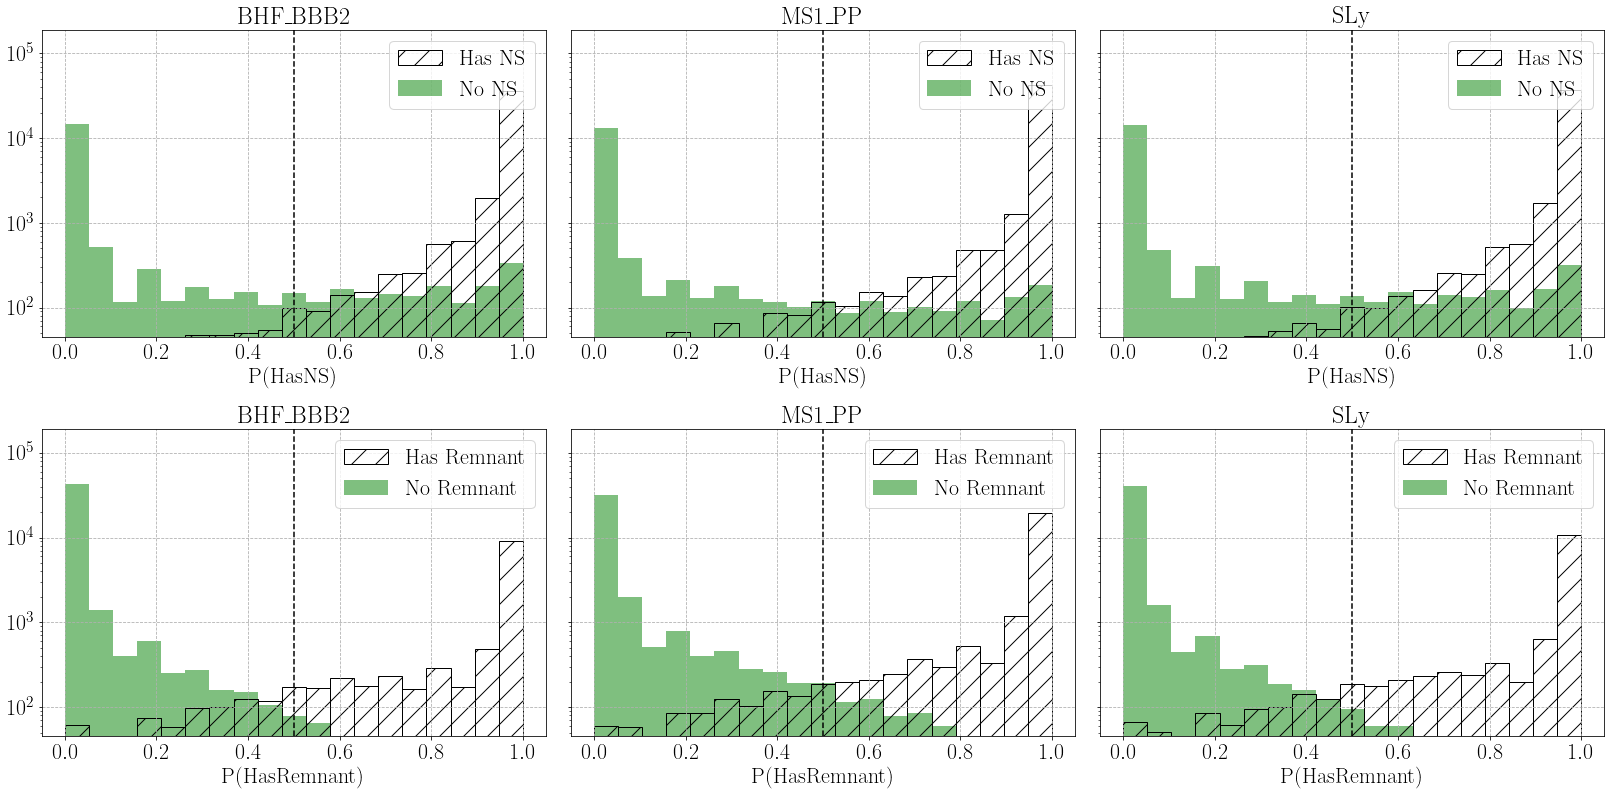

In [57]:
hists_paper(EOS_3, EOSdic)

Doing APR4_EPP
File shape :  (198961, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  198961
Nº of events for training:  139273
Nº of events for testing:  59688
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_APR4_EPP.joblib
Model score :  0.9530558906312827
Predicting probabilities...
Testing time (s) :  2.002453049994074


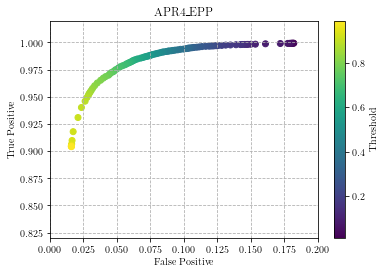

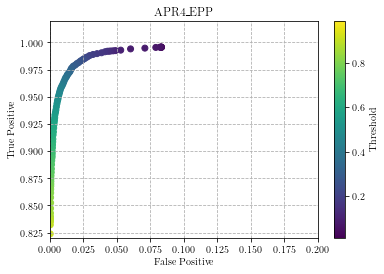

Doing BHF_BBB2
File shape :  (193624, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  193624
Nº of events for training:  135537
Nº of events for testing:  58087
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_BHF_BBB2.joblib
Model score :  0.9501609654483791
Predicting probabilities...
Testing time (s) :  1.7802967079915106


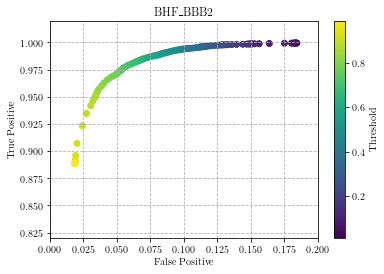

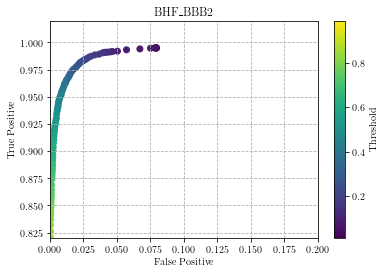

Doing H4
File shape :  (195764, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  195764
Nº of events for training:  137035
Nº of events for testing:  58729
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_H4.joblib
Model score :  0.9410512693899096
Predicting probabilities...
Testing time (s) :  1.8848183450754732


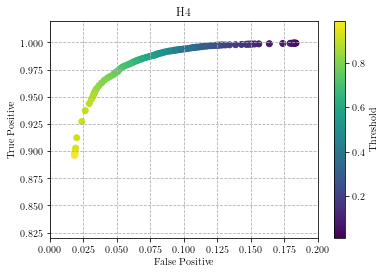

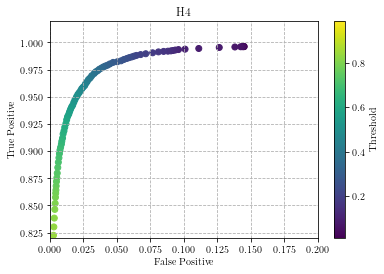

Doing HQC18
File shape :  (196070, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196070
Nº of events for training:  137249
Nº of events for testing:  58821
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_HQC18.joblib
Model score :  0.9503578653882117
Predicting probabilities...
Testing time (s) :  1.9141361900838092


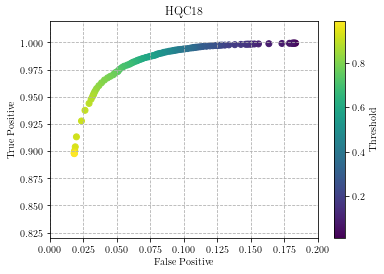

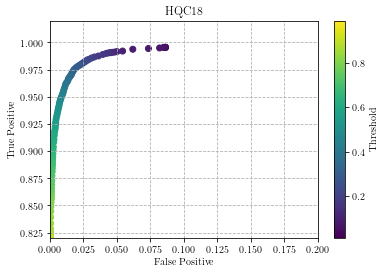

Doing KDE0V
File shape :  (194264, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  194264
Nº of events for training:  135985
Nº of events for testing:  58279
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_KDE0V.joblib
Model score :  0.9495530122342525
Predicting probabilities...
Testing time (s) :  1.7904665309470147


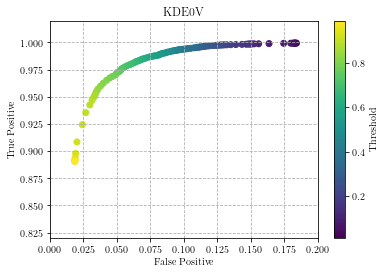

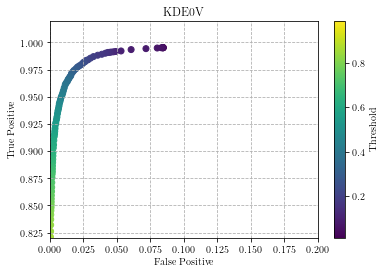

Doing KDE0V1
File shape :  (194434, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  194434
Nº of events for training:  136104
Nº of events for testing:  58330
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_KDE0V1.joblib
Model score :  0.9494599691410938
Predicting probabilities...
Testing time (s) :  1.826557053020224


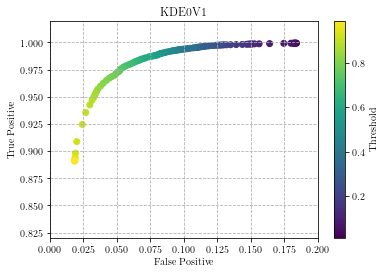

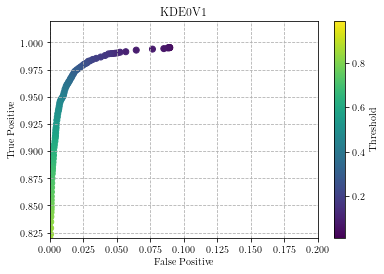

Doing MPA1
File shape :  (203407, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  203407
Nº of events for training:  142385
Nº of events for testing:  61022
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_MPA1.joblib
Model score :  0.9504768771918325
Predicting probabilities...
Testing time (s) :  2.13592036801856


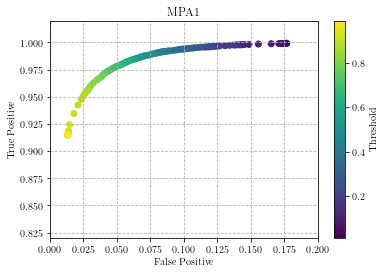

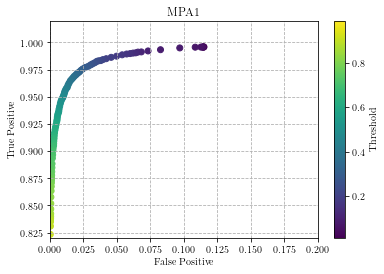

Doing MS1_PP
File shape :  (203407, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  203407
Nº of events for training:  142385
Nº of events for testing:  61022
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_MS1_PP.joblib
Model score :  0.9480842974664875
Predicting probabilities...
Testing time (s) :  2.1150144449202344


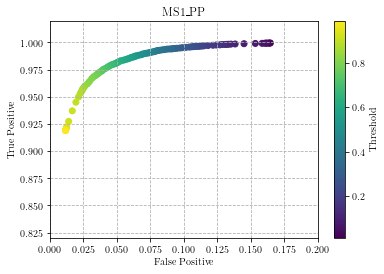

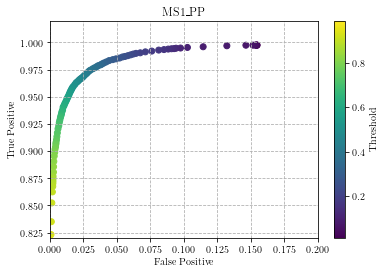

Doing MS1B_PP
File shape :  (203407, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  203407
Nº of events for training:  142385
Nº of events for testing:  61022
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_MS1B_PP.joblib
Model score :  0.947281308380584
Predicting probabilities...
Testing time (s) :  2.050115074031055


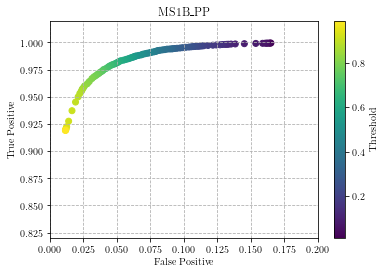

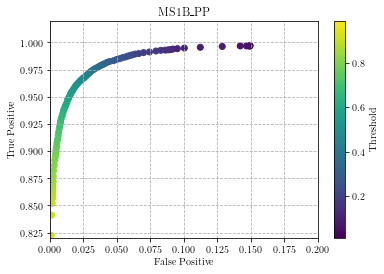

Doing RS
File shape :  (197789, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  197789
Nº of events for training:  138453
Nº of events for testing:  59336
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_RS.joblib
Model score :  0.9458001887555616
Predicting probabilities...
Testing time (s) :  1.859745161025785


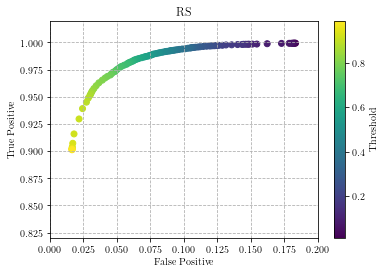

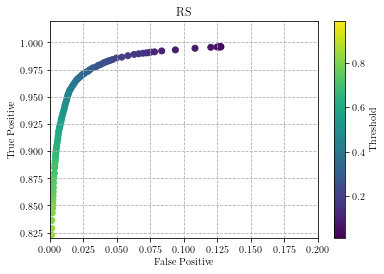

Doing SK255
File shape :  (198532, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  198532
Nº of events for training:  138973
Nº of events for testing:  59559
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SK255.joblib
Model score :  0.9460031229537098
Predicting probabilities...
Testing time (s) :  1.9753134640632197


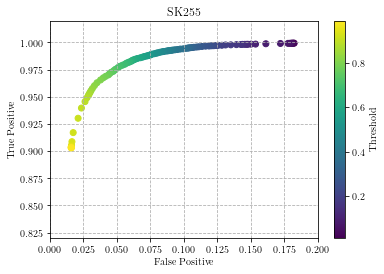

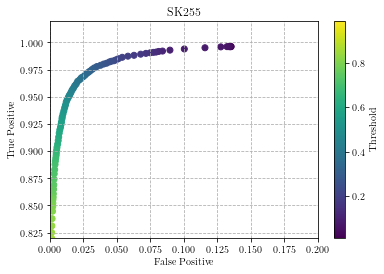

Doing SK272
File shape :  (201120, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  201120
Nº of events for training:  140784
Nº of events for testing:  60336
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SK272.joblib
Model score :  0.9454885971890745
Predicting probabilities...
Testing time (s) :  2.0341572840698063


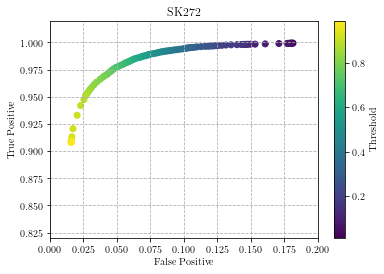

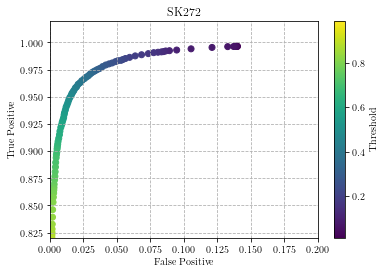

Doing SKI2
File shape :  (199062, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  199062
Nº of events for training:  139344
Nº of events for testing:  59718
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SKI2.joblib
Model score :  0.942613617334807
Predicting probabilities...
Testing time (s) :  1.9061382599174976


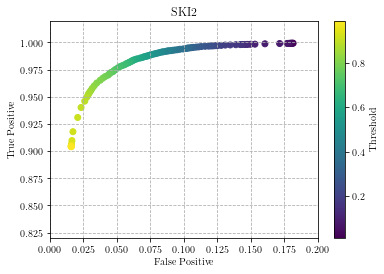

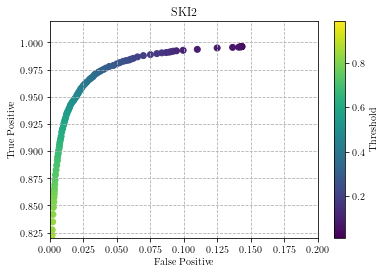

Doing SKI3
File shape :  (201373, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  201373
Nº of events for training:  140962
Nº of events for testing:  60411
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SKI3.joblib
Model score :  0.9436526460412838
Predicting probabilities...
Testing time (s) :  2.0039447399321944


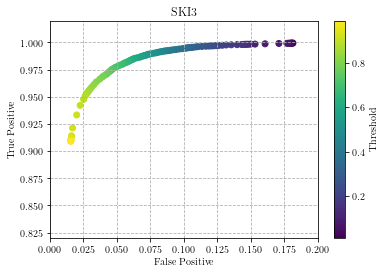

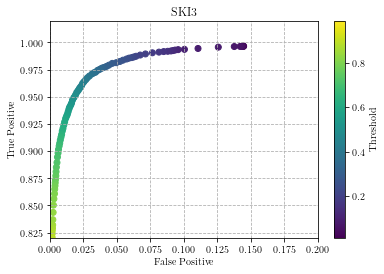

Doing SKI4
File shape :  (199255, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  199255
Nº of events for training:  139479
Nº of events for testing:  59776
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SKI4.joblib
Model score :  0.9493609475374732
Predicting probabilities...
Testing time (s) :  1.9964027089299634


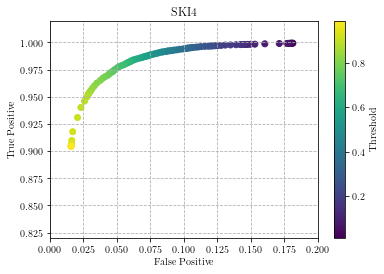

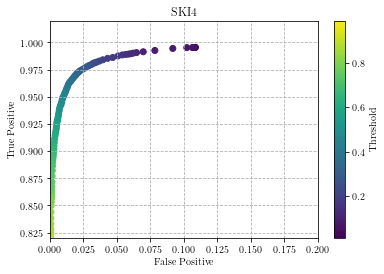

Doing SKI5
File shape :  (201373, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  201373
Nº of events for training:  140962
Nº of events for testing:  60411
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SKI5.joblib
Model score :  0.9447451623048783
Predicting probabilities...
Testing time (s) :  2.009946521022357


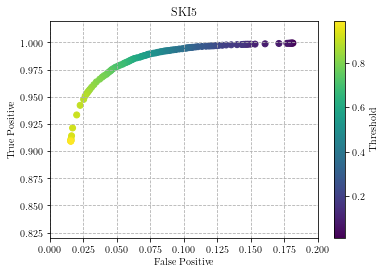

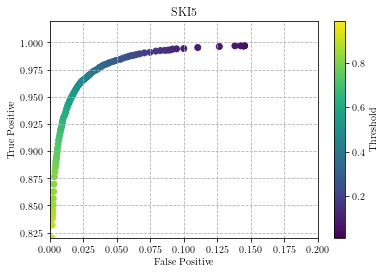

Doing SKI6
File shape :  (199821, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  199821
Nº of events for training:  139875
Nº of events for testing:  59946
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SKI6.joblib
Model score :  0.9492209655356487
Predicting probabilities...
Testing time (s) :  1.9204739900305867


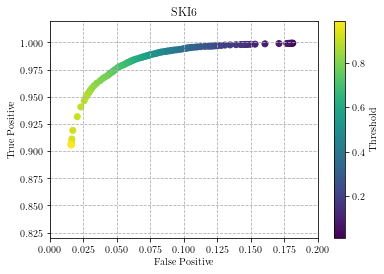

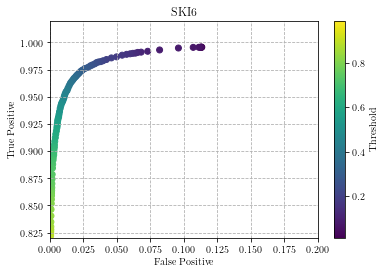

Doing SKMP
File shape :  (197566, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  197566
Nº of events for training:  138297
Nº of events for testing:  59269
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SKMP.joblib
Model score :  0.9477298419072365
Predicting probabilities...
Testing time (s) :  1.851695608929731


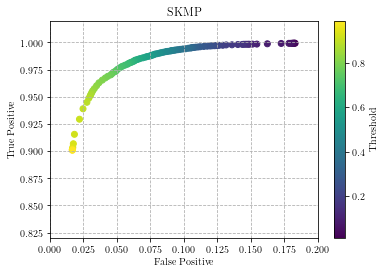

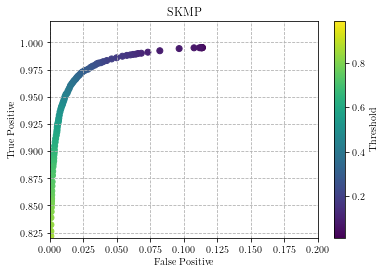

Doing SKOP
File shape :  (194522, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  194522
Nº of events for training:  136166
Nº of events for testing:  58356
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SKOP.joblib
Model score :  0.948128727123175
Predicting probabilities...
Testing time (s) :  1.729648204986006


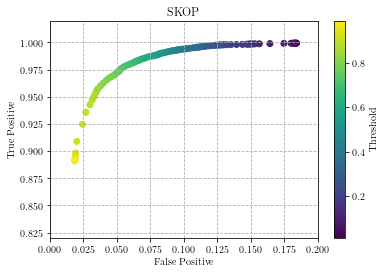

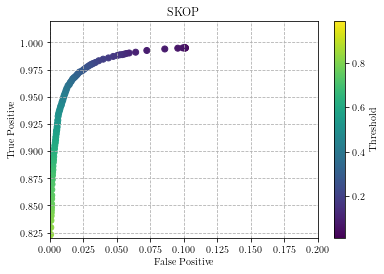

Doing SLy
File shape :  (196264, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SLy.joblib
Model score :  0.949727407055147
Predicting probabilities...
Testing time (s) :  1.8369286679662764


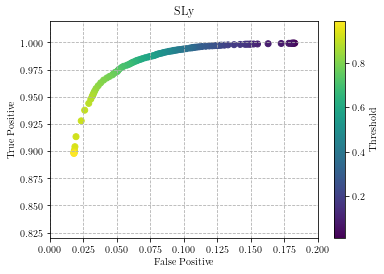

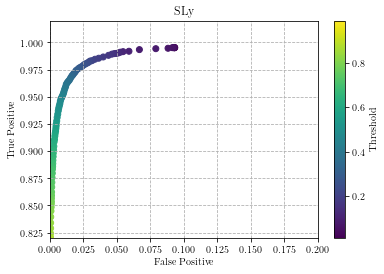

Doing SLY2
File shape :  (196264, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SLY2.joblib
Model score :  0.94974439103925
Predicting probabilities...
Testing time (s) :  1.8466328220674768


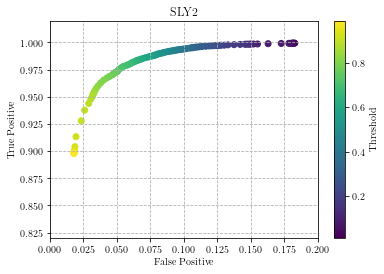

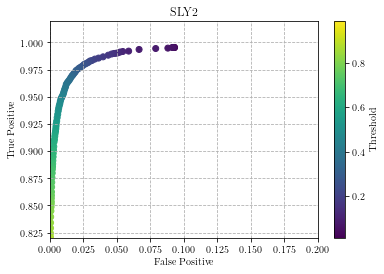

Doing SLY9
File shape :  (198883, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  198883
Nº of events for training:  139219
Nº of events for testing:  59664
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SLY9.joblib
Model score :  0.9488468758380263
Predicting probabilities...
Testing time (s) :  1.9239934019278735


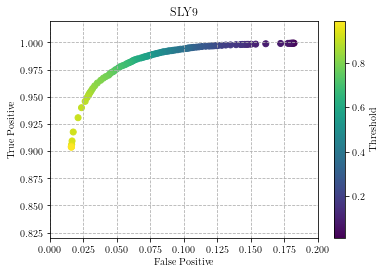

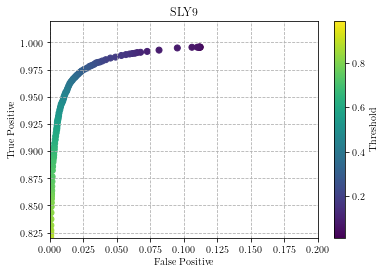

Doing SLY230A
File shape :  (197359, 11)
[ 1.006907  1.726921  1.172679 ... 79.196968 66.51236  59.432453]
************************************************************
Loading data...
Nº of features:  5
Nº of events:  197359
Nº of events for training:  138152
Nº of events for testing:  59207
Datasets loaded!
************************************************************
loading  /home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/optimal_models_final/knn_3cat_grid_eos_SLY230A.joblib
Model score :  0.9502085902004831
Predicting probabilities...
Testing time (s) :  1.8706089470069855


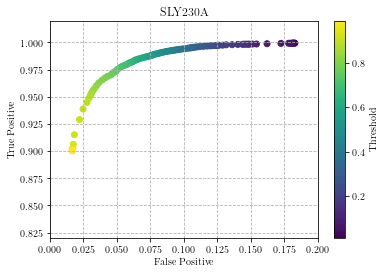

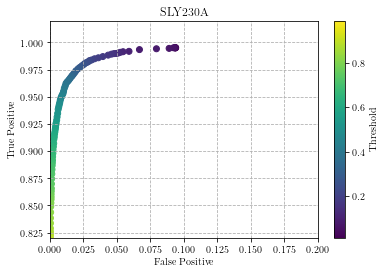

In [6]:
for eos in EOS:
    print("Doing", eos)
    KNN = KNNclassy.ClassificationKNN()
    KNN.load_original_dataset(pathData,eos+"/EMB/original_data_"+eos+"_s300_f0d7.csv")
    KNN.loadModel(pathClassy+"optimal_models_final/", "knn_3cat_grid_eos_"+eos)
    new_dic = {}
    new_dic['knn'] = KNN
    new_dic['bayes'] = BayesFactor[count]
    EOSdic[eos] = new_dic
    count = count + 1
   
    KNN.compute_metrics()
    
    EOSdic[eos]['NS_FP'], EOSdic[eos]['NS_TP'], EOSdic[eos]['NS_thr'] = ROC_NS(KNN, thr_wanted = [],figname='figsKNN_eos/ROC_NS/ROC_NS_eos_'+eos)
    EOSdic[eos]['REM_FP'], EOSdic[eos]['REM_TP'], EOSdic[eos]['REM_thr'] = ROC_REM(KNN, thr_wanted = [],figname='figsKNN_eos/ROC_REM/ROC_REM_eos_'+eos)
    

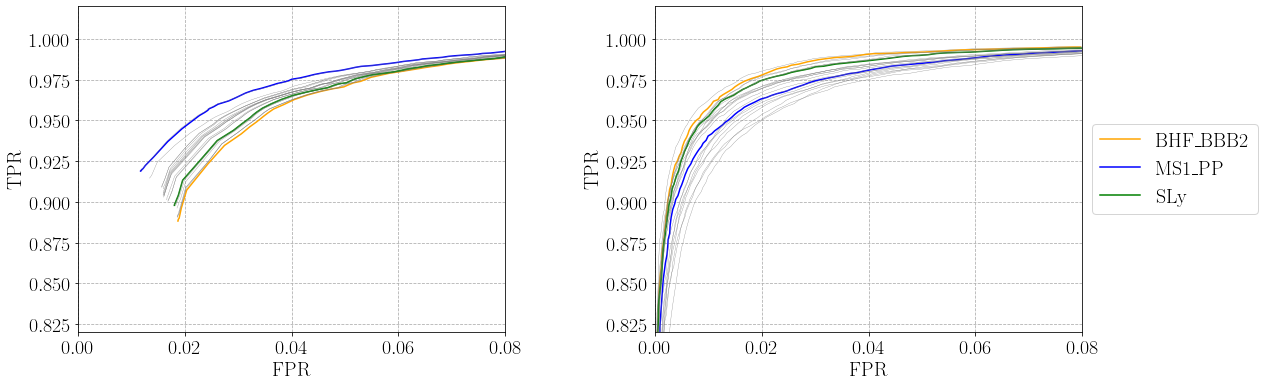

In [24]:
ROC_paper(EOS,EOSdic)